In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
#' each row is an observation, each column is a feature
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [4]:
#' in scikit-learn features and response are separate objects
#' lets store feature matrix in X 
#' lets store response vector in y

X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
#' scikit-learn is organised into modules, to make it easy to find classes.
import sklearn
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 'base',
 'clone',
 'config_context',
 'datasets',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'logger',
 'logging',
 'preprocessing',
 're',
 'set_config',
 'setup_module',
 'show_versions',
 'sys',
 'utils',
 'warnings']

In [6]:
#' scikit-learn has a 4 steps to modeling
#' 1: import the class you want to use.
#' 2: instantiate the class. Here you can specify tuning parameters.
#' 3: fit / train the model
#' 4: predict response for a new observation.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
print(knn.predict([[3,5,4,2]]))

[2]


In [7]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
print(knn.predict(X_new))

[2 1]


In [8]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
print(knn.predict(X_new))

[1 1]


In [9]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


In [10]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


In [11]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


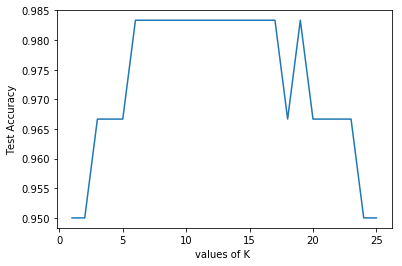

In [15]:
#' lets iterate through a list of K values, and plot test accuracys for each value of K.
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('values of K ')
plt.ylabel('Test Accuracy')
plt.show()

In [16]:
#' once model is chosen, and optimal parameters set, and ready to make predictions using out-of-sample-data
#'remember to retrain the model using all the data. otherwise will be throwing away valuable training data

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y) # using all the dataschool
print(knn.predict([[3, 5, 4, 2]])) # an out-of-sample observation

[1]


In [17]:
import pandas as pd

In [18]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = 0)
print(data.head())
print(data.tail())
print(data.shape)

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
        TV  radio  newspaper  sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4
(200, 4)


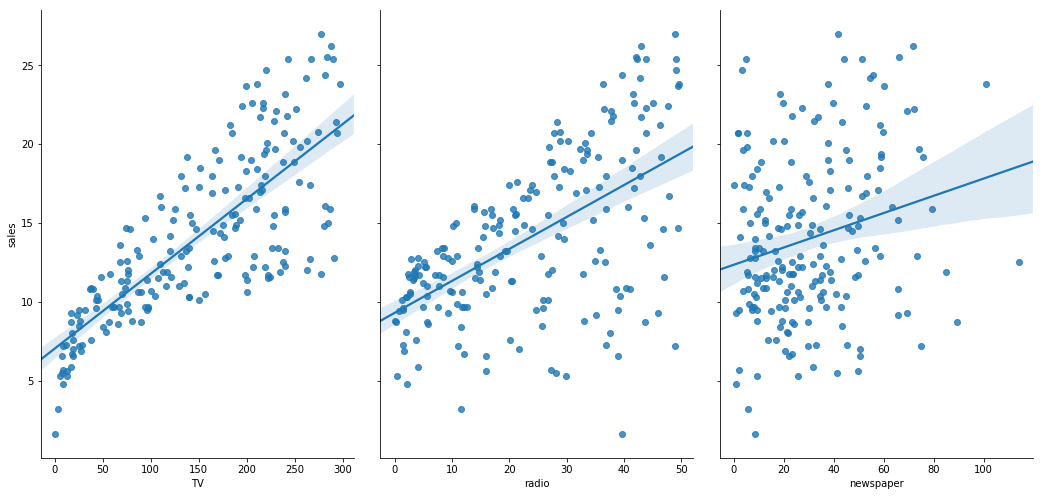

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data, x_vars = ["TV", "radio", "newspaper"], y_vars = "sales", height = 7, aspect = 0.7, kind = "reg")
plt.show()

In [20]:
#' we want to predict sales based on advertising hours, this is a regression problem.
feature_cols = ["TV", "radio", "newspaper"]
X = data[feature_cols] # subset original dataframe
print(X.head)
print(X.shape)
print(type(X))

<bound method NDFrame.head of         TV  radio  newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
6      8.7   48.9       75.0
7     57.5   32.8       23.5
8    120.2   19.6       11.6
9      8.6    2.1        1.0
10   199.8    2.6       21.2
11    66.1    5.8       24.2
12   214.7   24.0        4.0
13    23.8   35.1       65.9
14    97.5    7.6        7.2
15   204.1   32.9       46.0
16   195.4   47.7       52.9
17    67.8   36.6      114.0
18   281.4   39.6       55.8
19    69.2   20.5       18.3
20   147.3   23.9       19.1
21   218.4   27.7       53.4
22   237.4    5.1       23.5
23    13.2   15.9       49.6
24   228.3   16.9       26.2
25    62.3   12.6       18.3
26   262.9    3.5       19.5
27   142.9   29.3       12.6
28   240.1   16.7       22.9
29   248.8   27.1       22.9
30    70.6   16.0       40.8
..     ...    ...        ...
171   50.0   11.6       18.4
172  164.5   

In [21]:
y = data["sales"] # data.sales also works
print(y.head)
print(y.shape)
print(type(y))

<bound method NDFrame.head of 1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
6       7.2
7      11.8
8      13.2
9       4.8
10     10.6
11      8.6
12     17.4
13      9.2
14      9.7
15     19.0
16     22.4
17     12.5
18     24.4
19     11.3
20     14.6
21     18.0
22     12.5
23      5.6
24     15.5
25      9.7
26     12.0
27     15.0
28     15.9
29     18.9
30     10.5
       ... 
171     8.4
172    14.5
173     7.6
174    11.7
175    11.5
176    27.0
177    20.2
178    11.7
179    11.8
180    12.6
181    10.5
182    12.2
183     8.7
184    26.2
185    17.6
186    22.6
187    10.3
188    17.3
189    15.9
190     6.7
191    10.8
192     9.9
193     5.9
194    19.6
195    17.3
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64>
(200,)
<class 'pandas.core.series.Series'>


In [22]:
#' split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#' default split is 75% for training and 25% for testing

(150, 3)
(150,)
(50, 3)
(50,)


In [23]:
from sklearn.linear_model import LinearRegression

#' instantiate
linreg = LinearRegression()
linreg.fit(X_train, y_train) # learn the coefficients
print(linreg.intercept_) # print the intercept and coefficients
print(linreg.coef_)
print(list(zip(feature_cols, linreg.coef_))) # can pair the feature names with the coefficients

2.8769666223179318
[0.04656457 0.17915812 0.00345046]
[('TV', 0.04656456787415029), ('radio', 0.17915812245088839), ('newspaper', 0.003450464711180378)]


In [24]:
#' making predictions with linear model
y_pred = linreg.predict(X_test)
print(y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [26]:
#' Mean Absolute Error (MAE)
#' it is the mean of the absolute value of the errors
#' error is the difference between the true and predicted values
#' a short example below:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
print((10 + 0 + 20 + 10)/4.) # calculate MAE by hand

10.0


In [27]:
from sklearn import metrics # calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))

10.0


In [28]:
#' MSE: mean squared error
print((10**2 + 0**2 + 20**2 + 10**2)/4.) # calculate MSE by hand
print(metrics.mean_squared_error(true, pred))
#' MSE is a bit harder to interpret than MAE

150.0
150.0


In [29]:
#' RMSE: root mean squared error
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.)) # by hand
print(np.sqrt(metrics.mean_squared_error(true, pred)))
#' notice RMSE is a bit larger than MAE, squaring of errors increases the weight of larger errors

12.24744871391589
12.24744871391589


In [31]:
#' compute RMSE for sales prediction
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#' value of 1.4 is pretty good as sales ranged from 5 to 25

1.404651423032895


In [32]:
# lets remove newspapers, as it showed week correlation on visualisation
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read in the iris data
iris = load_iris()

In [35]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [36]:
#' lets check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


In [38]:
#' k-fold cross-validation:
#' split data into K folds
#' use 1 fold as testing and remainder as training
#' calculate test accuracy
#' repeat K times with different folds!
#' use average test accuracy as the estimate of out-of-sample accuracy

#' simulation of splitting a dataset of 25 observations into 5 folds using KFold!
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [39]:
kf

<generator object _BaseKFold.split at 0x1a20bd35c8>

In [40]:
#' print the contents of each training and testing set from simulation
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [41]:
from sklearn.model_selection import cross_val_score
#' 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
#' use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [42]:
#' search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


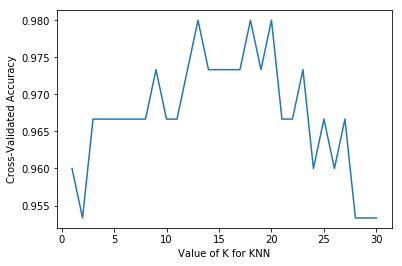

In [43]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### Deep Learning: Tensorflow and Keras
Reinforcement learning: an agent that interacts with the environment, learn from feedbacks  
ANN => y^ = activation(dot(W, input) + b)  
Deep NN => ANN with multiple hidden layers  
Feed-forward NNs => Perceptrons, Optimizer, Back propagation(Gradient Descent)   
Activation functions: sigmoid, telu, softmax, tanh  
Tensorflow and Keras  
CNNs and RNNs

In [3]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [4]:
# Load the IMDB data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)#argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words

In [50]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [51]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
# One hot encode the input
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                     
    return results

In [6]:
x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data) 

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [55]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [56]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [7]:
# validation set by setting apart 10,000 samples from the original training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.5085 - acc: 0.7814 - val_loss: 0.3795 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3004 - acc: 0.9043 - val_loss: 0.3002 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.2179 - acc: 0.9286 - val_loss: 0.3081 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2839 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3141 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.0979 - acc: 0.9707 - val_loss: 0.3128 - val_ac

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']

In [12]:
epochs = range(1, len(acc) + 1)

In [1]:
import pandas as pd

In [9]:
filepath_dict = {'yelp':   '~/data/yelp_labelled.txt',
                 'amazon': '~/data/amazon_cells_labelled.txt',
                 'imdb':   '~/data/imdb_labelled.txt'}

In [10]:
df_list = []

In [11]:
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object
